# 🏠 Linear Regression on California Housing Data

In this notebook, we implement linear regression **from scratch** using **NumPy**, apply it to the **California Housing Dataset**, and optimize the model using **batch gradient descent**. The feature we use is `AveRooms`, and the target is the median house value.


### Section 1: Import Libraries


In [1]:
# for building linear regression models and preparing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Section 2: load the dataset - California Housing and explore data by plotting the data

In order to build a linear regression model, I wanted to identify a feature (x) that has a strong linear relationship with the target variable (y, which is house price). To do this, I explored several features from the dataset.

As a result, I select "Median Income" as a feature.


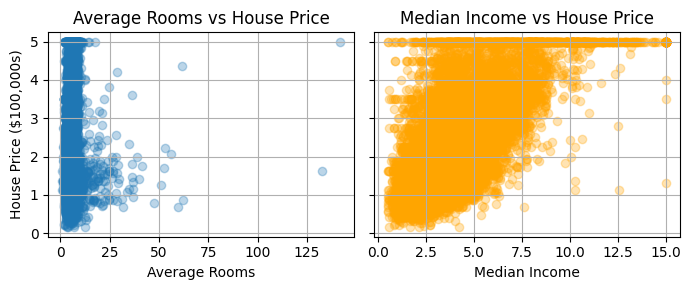

In [2]:
# load and Explore Dataset - California Housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)

fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
# plot AveRooms
axes[0].scatter(df["AveRooms"], data.target, alpha=0.3)
axes[0].set_title("Average Rooms vs House Price")
axes[0].set_xlabel("Average Rooms")
axes[0].set_ylabel("House Price ($100,000s)")
axes[0].grid(True)

# plot MedInc
axes[1].scatter(df["MedInc"],data.target, alpha=0.3, color='orange')
axes[1].set_title("Median Income vs House Price")
axes[1].set_xlabel("Median Income")
axes[1].grid(True)

plt.tight_layout()
plt.show()

x = df.MedInc.values
y = data.target

#Section 3: Splitting the Dataset: 90% Training / 10% Testing

The full dataset contains 20,640 samples. To evaluate our model's performance, we split the data into:

Training set: 90% (18,576 samples)

Test set: 10% (2,064 samples)

In [3]:
# split original data into training and testing sets
x_train, x_test,  y_train, y_test  = train_test_split(x, y, test_size=0.20, random_state=1)

print(f"Total samples: {len(x)}")
print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")

Total samples: 20640
Training samples: 16512
Test samples: 4128


#Section 4: implement linear regression from scratch & cost trend

We implemented linear regression from scratch using gradient descent.  
The L-shaped cost trend confirms successful convergence of the model.

In [4]:
# calculate gradients for weight and bias
def compute_gradient(x, y, w, b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw += (f_wb - y[i]) * x[i]
    dj_db += f_wb - y[i]

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [5]:
# to calculate the cost function
def compute_cost(x, y, w, b):
  total_cost = 0
  m = x.shape[0]
  for i in range(m):
    f_wb = w * x[i] + b
    total_cost += (f_wb - y[i]) ** 2
  return total_cost / (2 * m)

In [6]:
# to iteratively update weights using the computed gradients
def gradient_descent(x, y, w, b, learning_rate, iterations):
  total_cost_history = []
  for i in range(iterations):
    dj_dw, dj_db = compute_gradient(x, y, w, b)
    w = w - learning_rate * dj_dw
    b = b - learning_rate * dj_db
    total_cost = compute_cost(x, y, w, b)
    total_cost_history.append(total_cost)
  return w, b, total_cost_history

In [7]:
# initialize parameters
w = 0.5
b = 0.5
learning_rate = 0.01
iterations = 1000

final_w, final_b, total_cost_history = gradient_descent(x_train, y_train, w, b, learning_rate, iterations)
print(f"final_w: {final_w}, final_b: {final_b}")

final_w: 0.4194052513383688, final_b: 0.45267952822706964


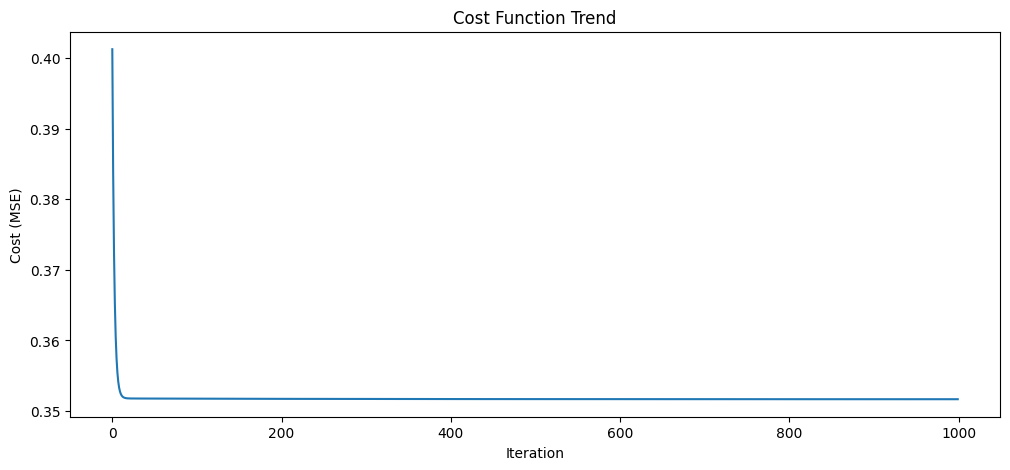

In [8]:
# plot cost through interation
plt.figure(figsize=(12, 5))
plt.plot(total_cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Trend')
plt.show()

#Section 5: use built-in linear regression lib to train

In [9]:
# use built-in lib to train
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [10]:
# compare the results of w and b using two different methods
print("Scikit-learn model weight (w):", model.coef_)
print("Manual gradient descent final weight (w):", final_w)

print("Scikit-learn model bias (b):", model.intercept_)
print("Manual gradient descent final bias (b):", final_b)

Scikit-learn model weight (w): [0.42055457]
Manual gradient descent final weight (w): 0.4194052513383688
Scikit-learn model bias (b): 0.4472183362106792
Manual gradient descent final bias (b): 0.45267952822706964


#Section 6: forecast and result visualization

In this section, we use two approaches (manual gradient descent and scikit-learn's `LinearRegression`) to predict housing prices and compare their performance.


In [11]:
# use scikit-learn to forecast
y_pred_sklearn = model.predict(x_test.reshape(-1, 1))

# calculate R² and MSE
r2 = r2_score(y_test, y_pred_sklearn)
mse = mean_squared_error(y_test, y_pred_sklearn)

print("R² score:", r2)
print("Mean Squared Error:", mse)


R² score: 0.47190835934467723
Mean Squared Error: 0.692692969609108


In [12]:
# use munual method to forecast
y_pred_manual = final_w * x_test + final_b

mse_manual = ((y_test - y_pred_manual) ** 2).mean()
print("Test MSE (manual gradient descent):", mse_manual)

Test MSE (manual gradient descent): 0.6926561608542026


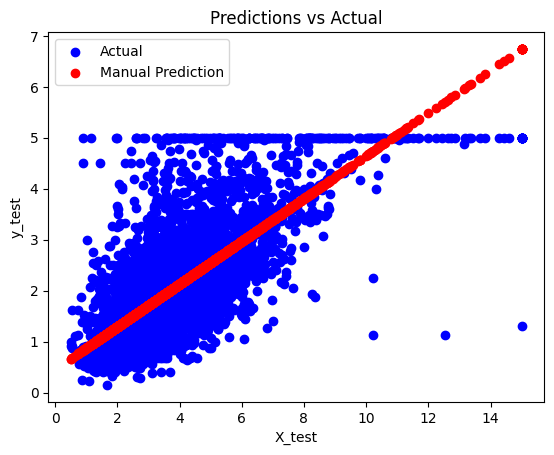

In [13]:
# plot the prediction

plt.scatter(x_test, y_test, label='Actual', color='blue')
plt.scatter(x_test, y_pred_manual, label='Manual Prediction', marker='o', color='red')
plt.legend()
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Predictions vs Actual')
plt.show()

###  Summary

In this notebook, we built a linear regression model to predict California housing prices using both manual gradient descent and scikit-learn's `LinearRegression`. We compared their results and visualized the predictions against actual housing prices. Both methods produced similar results, demonstrating a solid understanding of linear regression and model evaluation.

